In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

In [2]:
N = 1000
X = np.zeros((N, 2))  # NxD = 500x2

In [3]:
rs = np.random.RandomState(5566)

In [55]:
X[:, 0] = rs.normal(2, 1.5, N)
f = lambda x: 1.5 * x
X[:, 1] = f(X[:, 0]) + rs.normal(-4, 1.5, N)
x, y = X[:, 0], X[:, 1]

In [56]:
# Alternative way to construct X
# x, y = rs.multivariate_normal(
#     mean=[2, 1],
#     cov=[[5, 1.5], [1.5, 2]],
#     size=N
# ).T

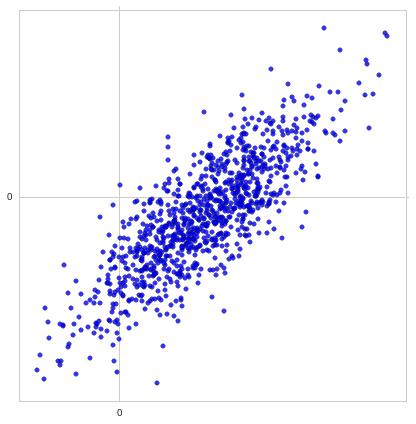

In [62]:
with sns.axes_style("whitegrid"):
    grid = sns.JointGrid(x, y, ratio=100)
    grid.ax_joint.set_xticks([0], minor=False)
    grid.ax_joint.set_yticks([0], minor=False)
    grid.plot_joint(plt.scatter, alpha=.8)

In [89]:
def plot_scatter(X, full_grid=False):
    x, y = X[:, 0], X[:, 1]
    with sns.axes_style("whitegrid"):
        grid = sns.JointGrid(x, y, ratio=100)
        if not full_grid:
            grid.ax_joint.set_xticks([0], minor=False)
            grid.ax_joint.set_yticks([0], minor=False)
        grid.plot_joint(plt.scatter, alpha=.8)
    return grid

In [63]:
X -= np.mean(X, axis = 0) # zero-center the data (important)

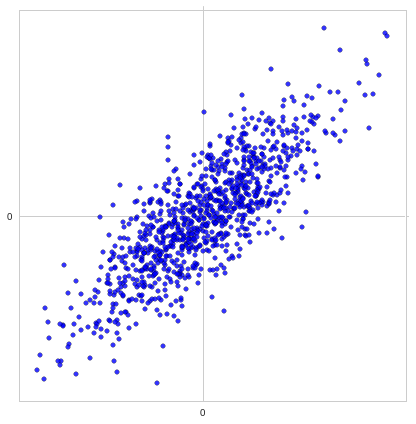

In [66]:
plot_scatter(X)

In [68]:
cov = np.dot(X.T, X) / X.shape[0] # get the data covariance matrix
cov

array([[ 2.08927214,  3.03262563],
       [ 3.03262563,  6.62191014]])

In [69]:
U, S, V = np.linalg.svd(cov)

In [70]:
U, S, V

(array([[-0.44798363, -0.89404176],
        [-0.89404176,  0.44798363]]),
 array([ 8.14148866,  0.56969362]),
 array([[-0.44798363, -0.89404176],
        [-0.89404176,  0.44798363]]))

In [71]:
Xrot = np.dot(X, U) # decorrelate the data

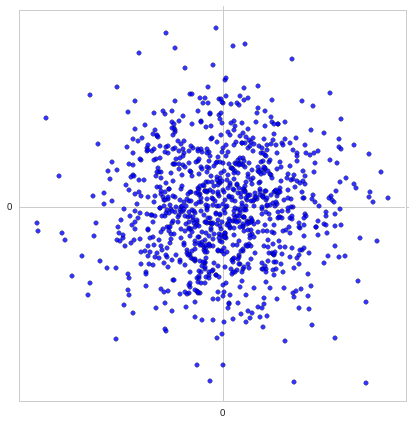

In [73]:
plot_scatter(Xrot)

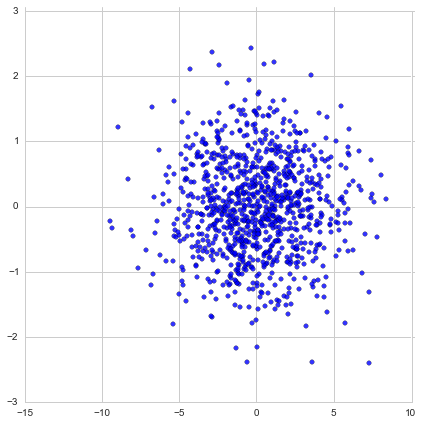

In [92]:
# not affected for 2-dimensional data
Xrot_reduced = np.dot(X, U[:,:2])
plot_scatter(Xrot_reduced, full_grid=True)

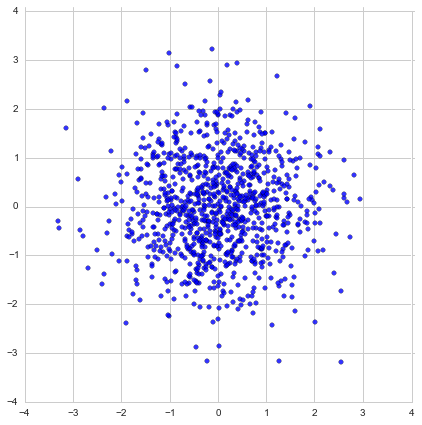

In [94]:
Xwhite = Xrot / np.sqrt(S + 1e-5)
plot_scatter(Xwhite, full_grid=True)

In [95]:
%pdb on

Automatic pdb calling has been turned ON


In [ ]:
def ride_eva(pilot):
    if pilot == 'shinji':
        raise SystemError('逃げちゃダメだ' * 20)

ride_eva('shinji')

SystemError: 逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ逃げちゃダメだ

> <ipython-input-96-00813f25acd0>(3)ride_eva()
      2     if pilot == 'shinji':
----> 3         raise SystemError('逃げちゃダメだ' * 20)
      4 

